## ETL 
Data for stroke deaths is extracted from CDC open data ( https://www.cdc.gov/dhdsp/maps/atlas/data-sources.html)
The source of Stroke Mortality data among Adults (35+) by State/Territory and County is the NVSS Deaths National Vital Statistics System. Bridged-Race Postcensal Population Estimates from National Center for Health Statistics. For the mortality the total number follows  International Classification of Diseases, 10th Revision (ICD-10) codes All Stroke: I60-I69; underlying cause of death and includes Ischemic (I63, I65-I66)  and Hemorrhagic (I60-I62). 

In [1]:
# make sure to install this package before running:
# python -m pip install --upgrade pip
!pip install sodapy

In [32]:
import pandas as pd
pd.set_option('display.max_columns', 20)
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from config import MyAppToken , username, password

from sodapy import Socrata

In [18]:
# Socrata is used to access the API enpoint from CDC
# The data is open source and registering to Socrata is free. The 
# use of tolken just makes sure there are no interuption or limitations on the data size at one time
# The Host Name for the API endpoint (the https:// part and /resources/ will be added automatically)

data_url='chronicdata.cdc.gov'
MyAppToken='px7JjOQLMt0zT2f5o7utbLBcj'
username="mpmarinkovic@gmail.com"
password="!00Hagase"

# The data set at the API endpoint 

data_set_lib = ["tqwu-4a7k",'v246-z5tb','kgsi-35re', 'kpwh-eddm ','dhsy-4sea']

data_set="tqwu-4a7k" 
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

     
# Set the timeout to 60 seconds    
client.timeout = 60


In [19]:
# Get metadata about the target data set
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon']

In [20]:
# The SoDaPy library converts this JSON object to a Python list of dictionaries
# SODA APIs are paged, and return a maximum of 50,000 records per page
# good practice to split up the request into multiple smaller queries 

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 10,000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break


In [33]:
# Convert the list of dictionaries to a Pandas data frame

# data_df = pd.DataFrame.from_records(results) # not my fvorite
data_df = json_normalize(results)
data_df.head(5)

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Stroke Mortality,2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02013,55.442393334,-161.9599296,NaN,NaN
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Stroke Mortality,0,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02016,53.648343064,-166.9175329,NaN,NaN
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Stroke Mortality,67.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02020,61.159144533,-149.1045591,NaN,NaN
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Stroke Mortality,104.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02050,60.923647647,-159.7532618,NaN,NaN
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Stroke Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02060,58.753495988,-156.694662,~,Insufficient Data


In [34]:
# Check datacounts
data_df.count()

year                          59094
locationabbr                  59094
locationdesc                  59094
geographiclevel               59094
datasource                    59094
class                         59094
topic                         59094
data_value                    28095
data_value_unit               59094
data_value_type               59094
stratificationcategory1       59094
stratification1               59094
stratificationcategory2       59094
stratification2               59094
topicid                       59094
locationid                    59094
y_lat                         59076
x_lon                         59076
data_value_footnote_symbol    30999
data_value_footnote           30999
dtype: int64

In [35]:
# Check datatypes
data_df.dtypes

year                          object
locationabbr                  object
locationdesc                  object
geographiclevel               object
datasource                    object
class                         object
topic                         object
data_value                    object
data_value_unit               object
data_value_type               object
stratificationcategory1       object
stratification1               object
stratificationcategory2       object
stratification2               object
topicid                       object
locationid                    object
y_lat                         object
x_lon                         object
data_value_footnote_symbol    object
data_value_footnote           object
dtype: object

In [ ]:
# client.close()

In [36]:
# change the data types 
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['y_lat'] = pd.to_numeric(data_df['y_lat'])
data_df['x_lon'] = pd.to_numeric(data_df['x_lon'])
data_df.dtypes

year                            int64
locationabbr                   object
locationdesc                   object
geographiclevel                object
datasource                     object
class                          object
topic                          object
data_value                    float64
data_value_unit                object
data_value_type                object
stratificationcategory1        object
stratification1                object
stratificationcategory2        object
stratification2                object
topicid                        object
locationid                      int64
y_lat                         float64
x_lon                         float64
data_value_footnote_symbol     object
data_value_footnote            object
dtype: object

In [37]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2' , 'stratification2' ,'year','data_value','data_value_unit']]          

datasub_df.head()

,locationid,locationabbr,locationdesc,y_lat,x_lon,class,topic,stratificationcategory1,stratification1,stratificationcategory2,stratification2,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,NaN,"per 100,000 population"


In [38]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"lon","locationabbr":"state", "locationdesc": "county",
                                        "stratificationcategory1":"param1","stratification1":"param1sub",
                                        "stratificationcategory2":"param2","stratification2":"param2sub"})

datasub_df.head() 

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2.0,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0.0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,NaN,"per 100,000 population"


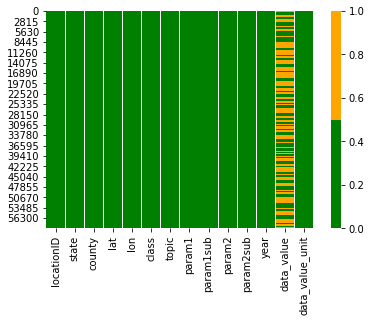

In [39]:
#cleaning data: first explore how many are missing 

cols = datasub_df.columns[:20] # first 30 columns
colours = ['green', 'orange'] # specify the colours - orange is missing. green is not missing.
sns.heatmap(datasub_df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in datasub_df.columns:
    pct_missing = np.mean(datasub_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

locationID - 0.0%
state - 0.0%
county - 0.0%
lat - 0.0%
long - 0.0%
data_value - 52.0%
data_value_unit - 0.0%
class - 0.0%
topic - 0.0%
stratificationcategory1 - 0.0%
stratification1 - 0.0%
stratificationcategory2 - 0.0%
stratification2 - 0.0%
year - 0.0%


In [41]:
#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna('')
datasub_df.head()

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,,"per 100,000 population"


In [42]:
datasub_df.dtypes

locationID           int64
state               object
county              object
lat                float64
lon                float64
class               object
topic               object
param1              object
param1sub           object
param2              object
param2sub           object
year                 int64
data_value          object
data_value_unit     object
dtype: object

In [43]:
#re-name the file
datayear= datasub_df['year'][1]
datayear

2017

In [106]:
data2017_df=datasub_df

In [107]:
data2017_df.count()

locationID         59076
state              59076
county             59076
lat                59058
lon                59058
class              59076
topic              59076
param1             59076
param1sub          59076
param2             59076
param2sub          59076
year               59076
data_value         59076
data_value_unit    59076
dtype: int64

In [46]:
# The second data set 
data_set="v246-z5tb"   
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             
record_limit = 10000     
results =[]           
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = json_normalize(results)


In [47]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['y_lat'] = pd.to_numeric(data_df['y_lat'])
data_df['x_lon'] = pd.to_numeric(data_df['x_lon'])

In [48]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','y_lat','x_lon',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2' , 'stratification2' ,'year','data_value','data_value_unit']] 


In [49]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "y_lat":"lat", "x_lon":"lon","locationabbr":"state", "locationdesc": "county",
                                        "stratificationcategory1":"param1","stratification1":"param1sub",
                                        "stratificationcategory2":"param2","stratification2":"param2sub"})
datasub_df.head() 

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year,data_value,data_value_unit
0,4,AZ,Arizona,34.292100,-111.664000,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,58.3,"per 100,000 population"
1,13,GA,Georgia,32.654900,-83.454700,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,White,2016,81.0,"per 100,000 population"
2,29229,MO,Wright County,37.274183,-92.472155,Cardiovascular Diseases,Stroke Mortality,Gender,Female,Race/Ethnicity,Hispanic,2016,NaN,"per 100,000 population"
3,30,MT,Montana,47.033200,-109.653000,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Black,2016,NaN,"per 100,000 population"
4,37,NC,North Carolina,35.547500,-79.401900,Cardiovascular Diseases,Stroke Mortality,Gender,Male,Race/Ethnicity,White,2016,79.8,"per 100,000 population"


In [51]:
#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna('')


In [108]:
datasub_df.columns

Index(['locationID', 'state', 'county', 'lat', 'lon', 'class', 'topic',
       'param1', 'param1sub', 'param2', 'param2sub', 'year', 'data_value',
       'data_value_unit'],
      dtype='object')

In [109]:
datasub_df.count()

locationID         59076
state              59076
county             59076
lat                59058
lon                59058
class              59076
topic              59076
param1             59076
param1sub          59076
param2             59076
param2sub          59076
year               59076
data_value         59076
data_value_unit    59076
dtype: int64

In [54]:
# Merge df on all common columns
semicombined_df = pd.merge(data2017_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'param1', 'param1sub', 'param2', 'param2sub'])
#Rename columns 
semicombined_df = semicombined_df.rename(columns={"data_value_x":"2017", "data_value_y":"2016"})
semicombined_df.head()

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year_x,2017,data_value_unit_x,year_y,2016,data_value_unit_y
0,2013,AK,Aleutians East,55.442393,-161.959930,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,2,"per 100,000 population",2016,2,"per 100,000 population"
1,2016,AK,Aleutians West,53.648343,-166.917533,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,0,"per 100,000 population",2016,0,"per 100,000 population"
2,2020,AK,Anchorage,61.159145,-149.104559,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,67.2,"per 100,000 population",2016,65.3,"per 100,000 population"
3,2050,AK,Bethel,60.923648,-159.753262,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,104.6,"per 100,000 population",2016,101.4,"per 100,000 population"
4,2060,AK,Bristol Bay,58.753496,-156.694662,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,,"per 100,000 population",2016,,"per 100,000 population"


In [110]:
semicombined_df.count()

locationID           58932
state                58932
county               58932
lat                  58914
lon                  58914
class                58932
topic                58932
param1               58932
param1sub            58932
param2               58932
param2sub            58932
year_x               58932
2017                 58932
data_value_unit_x    58932
year_y               58932
2016                 58932
data_value_unit_y    58932
dtype: int64

In [56]:
# The third data set at the API endpoint 
data_set="kgsi-35re"   
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             
record_limit = 10000     
results =[]           
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = json_normalize(results)
data_df.head(1)

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value_unit,data_value_type,data_value_footnote_symbol,...,stratification1,stratificationcategory2,stratification2,topicid,locationid,:@computed_region_he4y_prf8,:@computed_region_bxsw_vy29,location_1.latitude,location_1.longitude,data_value
0,2015,KY,Madison County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,...,Male,Race/Ethnicity,Black,T6,21151,1427,36,37.717847,-84.286105,NaN
1,2015,MO,Madison County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,...,Male,Race/Ethnicity,Asian and Pacific Islander,T6,29123,2121,18,37.477119,-90.350376,NaN
2,2015,TN,Hawkins County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,...,Female,Race/Ethnicity,American Indian and Alaskan Native,T6,47073,2052,39,36.441025,-82.945119,NaN
3,2015,IA,O'Brien County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,...,Overall,Race/Ethnicity,Overall,T6,19141,293,16,43.085562,-95.634828,74.4
4,2015,HI,Kauai County,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,...,Female,Race/Ethnicity,American Indian and Alaskan Native,T6,15007,1658,4,22.039971,-159.583922,NaN


In [59]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['location_1.latitude'] = pd.to_numeric(data_df['location_1.latitude'])
data_df['location_1.longitude'] = pd.to_numeric(data_df['location_1.longitude'])

In [112]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','location_1.latitude','location_1.longitude',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2','stratification2','year','data_value','data_value_unit']] 

#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "location_1.latitude":"lat", "location_1.longitude":"lon","locationabbr":"state", "locationdesc": "county",
                                        "stratificationcategory1":"param1","stratification1":"param1sub",
                                        "stratificationcategory2":"param2","stratification2":"param2sub"})

#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna('')
datasub_df.head(50)


,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year,data_value,data_value_unit
0,2013,AK,Aleutians East,55.440626,-161.962562,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,,"per 100,000 population"
1,2016,AK,Aleutians West,52.995403,-170.251538,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,,"per 100,000 population"
2,2020,AK,Anchorage,61.159049,-149.103905,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,70.7,"per 100,000 population"
3,2050,AK,Bethel,60.924483,-159.749655,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,95,"per 100,000 population"
4,2060,AK,Bristol Bay,58.754192,-156.694709,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,,"per 100,000 population"
5,2068,AK,Denali,63.678399,-149.962076,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,77.2,"per 100,000 population"
6,2070,AK,Dillingham,59.803151,-158.181608,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,113,"per 100,000 population"
7,2090,AK,Fairbanks North Star,64.809327,-146.586265,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,77.5,"per 100,000 population"
8,2100,AK,Haines,59.140721,-135.513878,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,64.3,"per 100,000 population"
9,2110,AK,Juneau,58.478434,-134.150437,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2013,65.7,"per 100,000 population"


In [113]:
datasub_df.count()

locationID         59076
state              59076
county             59076
lat                59058
lon                59058
class              59076
topic              59076
param1             59076
param1sub          59076
param2             59076
param2sub          59076
year               59076
data_value         59076
data_value_unit    59076
dtype: int64

In [81]:
# Merge confirmed and deaths df on all common columns
semicombined3_df = pd.merge(semicombined_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'param1', 'param1sub', 'param2', 'param2sub'])

#Rename columns 
semicombined3_df = semicombined3_df.rename(columns={"data_value":"2015"})

semicombined3_df.head(1)

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year_x,2017,data_value_unit_x,year_y,2016,data_value_unit_y,year,2015,data_value_unit
0,2,AK,Alaska,64.3173,-152.571,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,73.9,"per 100,000 population",2016,71.8,"per 100,000 population",2015,70.1,"per 100,000 population"


In [82]:
semicombined3_df.drop(['data_value_unit_x','data_value_unit_y'], axis=1, inplace=True)
semicombined3_df.head(2)

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year_x,2017,year_y,2016,year,2015,data_value_unit
0,2,AK,Alaska,64.3173,-152.571,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,73.9,2016,71.8,2015,70.1,"per 100,000 population"
1,2,AK,Alaska,64.3173,-152.571,Cardiovascular Diseases,Stroke Mortality,Gender,Male,Race/Ethnicity,Overall,2017,71.1,2016,70.1,2015,76.6,"per 100,000 population"


In [111]:
semicombined3_df.count()

locationID         1019
state              1019
county             1019
lat                1001
lon                1001
class              1019
topic              1019
param1             1019
param1sub          1019
param2             1019
param2sub          1019
year_x             1019
2017               1019
year_y             1019
2016               1019
year               1019
2015               1019
data_value_unit    1019
dtype: int64

In [94]:
# The 4th data set at the API endpoint 
data_set = 'kpwh-eddm'  
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             
record_limit = 10000     
results =[]           
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = json_normalize(results)
data_df.head(1)

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,stratificationcategory2,stratification2,topicid,locationid,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,location_1.latitude,location_1.longitude,data_value_footnote_symbol,data_value_footnote
0,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Stroke Mortality,71.7,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",...,Race/Ethnicity,Overall,T6,02020,51,1669,61.159049,-149.103905,NaN,NaN


In [95]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['location_1.latitude'] = pd.to_numeric(data_df['location_1.latitude'])
data_df['location_1.longitude'] = pd.to_numeric(data_df['location_1.longitude'])

In [96]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','location_1.latitude','location_1.longitude',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2','stratification2','year','data_value','data_value_unit']] 

#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "location_1.latitude":"lat", "location_1.longitude":"lon","locationabbr":"state", "locationdesc": "county",
                                        "stratificationcategory1":"param1","stratification1":"param1sub",
                                        "stratificationcategory2":"param2","stratification2":"param2sub"})

#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna('')
# datasub_df.head(2)

In [98]:
# Merge confirmed and deaths df on all common columns
semicombined4_df = pd.merge(semicombined3_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'param1', 'param1sub', 'param2', 'param2sub'])

#Rename columns 
semicombined4_df = semicombined4_df.rename(columns={"data_value":"2014"})
semicombined4_df.drop(['data_value_unit_x' ], axis=1, inplace=True)
semicombined4_df.head(1)

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,param2sub,year_x,2017,year_y,2016,year_x,2015,year_y,2014,data_value_unit_y
0,2,AK,Alaska,64.3173,-152.571,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,Overall,2017,73.9,2016,71.8,2015,70.1,2014,70.8,"per 100,000 population"


In [99]:
# The 5th data set at the API endpoint 
data_set = 'dhsy-4sea'  
# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             
record_limit = 10000     
results =[]           
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break
# Convert the list of dictionaries to a Pandas data frame        
data_df = json_normalize(results)
data_df.head(1)

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value_unit,data_value_type,data_value_footnote_symbol,...,stratification1,stratificationcategory2,stratification2,topicid,locationid,:@computed_region_he4y_prf8,:@computed_region_bxsw_vy29,location_1.latitude,location_1.longitude,data_value
0,2013,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Stroke Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,...,Overall,Race/Ethnicity,Overall,T6,02013,107,51,55.440626,-161.962562,NaN


In [100]:
data_df['year'] = pd.to_numeric(data_df['year'])
data_df['locationid'] = pd.to_numeric(data_df['locationid'])
data_df['data_value'] = pd.to_numeric(data_df['data_value'])
data_df['location_1.latitude'] = pd.to_numeric(data_df['location_1.latitude'])
data_df['location_1.longitude'] = pd.to_numeric(data_df['location_1.longitude'])

In [102]:
# reorganize columns
datasub_df = data_df[['locationid','locationabbr','locationdesc','location_1.latitude','location_1.longitude',
                      'class','topic','stratificationcategory1', 'stratification1' ,
                      'stratificationcategory2','stratification2','year','data_value','data_value_unit']] 

#Rename columns 
datasub_df = datasub_df.rename(columns={"locationid":"locationID", "location_1.latitude":"lat", "location_1.longitude":"lon","locationabbr":"state", "locationdesc": "county",
                                        "stratificationcategory1":"param1","stratification1":"param1sub",
                                        "stratificationcategory2":"param2","stratification2":"param2sub"})

#In this case the counties that had missing values will be changed by -1 to be easily recognizable
datasub_df['data_value']= datasub_df['data_value'].fillna('')
# datasub_df.head(2)

In [104]:
# Merge confirmed and deaths df on all common columns
StrokeMortality_df = pd.merge(semicombined4_df, datasub_df, on=['locationID','state', 'county', 'lat', 'lon',
                                                        'class', 'topic', 
                                                        'param1', 'param1sub', 'param2', 'param2sub'])

#Rename columns 
StrokeMortality_df = StrokeMortality_df.rename(columns={"data_value":"2013"})
StrokeMortality_df.drop(['data_value_unit_y' ], axis=1, inplace=True)
StrokeMortality_df.head(1)

,locationID,state,county,lat,lon,class,topic,param1,param1sub,param2,...,2017,year_y,2016,year_x,2015,year_y,2014,year,2013,data_value_unit
0,2,AK,Alaska,64.3173,-152.571,Cardiovascular Diseases,Stroke Mortality,Gender,Overall,Race/Ethnicity,...,73.9,2016,71.8,2015,70.1,2014,70.8,2013,74.2,"per 100,000 population"


In [105]:
StrokeMortality_df.count()

locationID         1018
state              1018
county             1018
lat                1000
lon                1000
class              1018
topic              1018
param1             1018
param1sub          1018
param2             1018
param2sub          1018
year_x             1018
2017               1018
year_y             1018
2016               1018
year_x             1018
2015               1018
year_y             1018
2014               1018
year               1018
2013               1018
data_value_unit    1018
dtype: int64

In [ ]:
# Save Cleaned/Organized df to csv
clean_df.to_csv("assets/data/stroke_death_clean.csv", index=False)
